In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

import shap

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

gc.enable()

from sklearn.metrics import roc_curve

In [47]:
app_train = pd.read_csv('app_train.csv')
app_test = pd.read_csv('app_test.csv')

In [4]:
app_train.shape

(307511, 241)

In [5]:
def imputation(dataframe: pd.DataFrame, columns) -> pd.DataFrame:
    df = dataframe.copy()
    for col in columns :
        df.loc[df[col].isna(), col] = df[col].mean()
    print(df.info())
    return df
    
X = app_train.copy()    
X = imputation(X, X.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 241 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: float64(240), object(1)
memory usage: 565.4+ MB
None


In [6]:
#pour corriger une erreure impliquant des attributs de type object
X = X.select_dtypes(exclude=['object'])

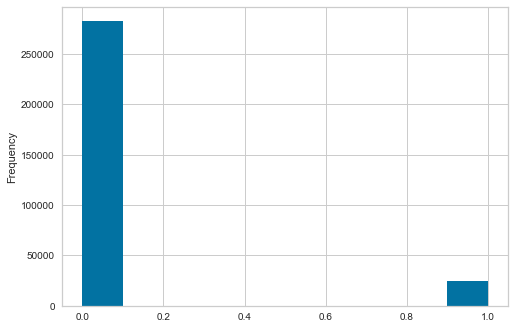

In [7]:
X['TARGET'].astype(int).plot.hist();

In [8]:
import imblearn
print(imblearn.__version__)

0.7.0


In [9]:
y =  X['TARGET']
#X.drop(columns = ['TARGET'])
X.drop('TARGET', inplace=True, axis=1)

In [10]:
print(X.isna().mean(axis=1).mean())
print(y.isna().mean().mean())

0.0
0.0


In [11]:
from imblearn.over_sampling import SMOTE 
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [12]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1.0: 282686, 0.0: 282686})


In [13]:
X.shape

(565372, 239)

In [14]:
X['TARGET'] = y

In [15]:
X = X.sample(n=250000, random_state=1)

In [16]:
X.shape

(250000, 240)

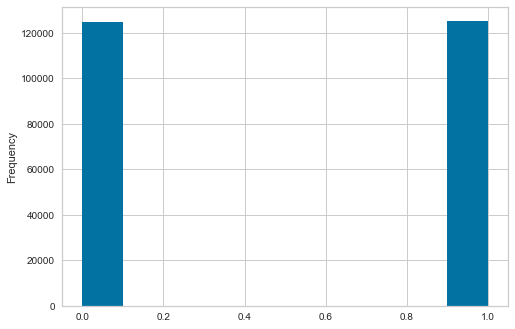

In [17]:
X['TARGET'].astype(int).plot.hist();

In [18]:
s = setup(X, target = 'TARGET', fix_imbalance=False, use_gpu=True)

,Description,Value
0,session_id,2174
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(250000, 240)"
5,Missing Values,0
6,Numeric Features,234
7,Categorical Features,5
8,Ordinal Features,0
9,High Cardinality Features,0


In [19]:
best = compare_models(exclude = ['lda', 'qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9559,0.9780,0.9130,0.9989,0.9540,0.9117,0.9151,4.3490
rf,Random Forest Classifier,0.9555,0.9756,0.9111,1.0000,0.9535,0.9109,0.9146,13.9320
gbc,Gradient Boosting Classifier,0.9552,0.9759,0.9109,0.9996,0.9532,0.9104,0.9140,247.3820
et,Extra Trees Classifier,0.9543,0.9821,0.9090,0.9998,0.9522,0.9086,0.9124,23.6050
ada,Ada Boost Classifier,0.9475,0.9715,0.9006,0.9940,0.9450,0.8949,0.8989,47.9920
dt,Decision Tree Classifier,0.9060,0.9059,0.9111,0.9022,0.9066,0.8119,0.8120,10.4590
knn,K Neighbors Classifier,0.7468,0.8356,0.9087,0.6870,0.7824,0.4932,0.5212,17.9990
ridge,Ridge Classifier,0.7018,0.0000,0.7128,0.6982,0.7055,0.4035,0.4036,0.5820
nb,Naive Bayes,0.6104,0.6779,0.4172,0.6847,0.5153,0.2214,0.2420,0.5320
lr,Logistic Regression,0.5883,0.6208,0.5696,0.5928,0.5809,0.1766,0.1768,19.0390


In [20]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=2174, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9556,0.9776,0.9124,0.9985,0.9535,0.9111,0.9145


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_DOCUMENT_4_0.0,FLAG_DOCUMENT_10_0.0,FLAG_DOCUMENT_12_0.0,NAME_INCOME_TYPE_Businessman_1.0,NAME_INCOME_TYPE_Student_0.0,TARGET,Label,Score
0,425728.000000,0.0,0.0,1.000000,0.000000,117000.0,593010.000000,23107.500000,495000.0,0.018850,...,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.9267
1,203752.000000,1.0,0.0,1.000000,2.000000,90000.0,180000.000000,9000.000000,180000.0,0.016612,...,1.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.9747
2,144305.000000,1.0,0.0,1.000000,1.000000,76500.0,202500.000000,10125.000000,202500.0,0.019101,...,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.9671
3,439264.000000,0.0,1.0,1.000000,0.000000,144000.0,675000.000000,29862.000000,675000.0,0.019689,...,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.9422
4,453281.000000,0.0,0.0,1.000000,1.000000,81000.0,76410.000000,8356.500000,67500.0,0.006207,...,1.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.9303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,331724.000000,0.0,1.0,1.000000,2.000000,270000.0,585000.000000,16218.000000,585000.0,0.031329,...,1.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.9203
74997,178910.140625,0.0,0.0,1.000000,0.000000,112500.0,675000.000000,33207.542969,675000.0,0.002042,...,0.827943,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.9995
74998,423458.000000,0.0,0.0,1.000000,0.000000,135000.0,288873.000000,19435.500000,238500.0,0.007330,...,1.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.8500
74999,380741.218750,0.0,1.0,0.979354,0.020646,292500.0,247428.296875,22684.609375,225000.0,0.035442,...,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.9997


# Shap kaggle

In [23]:
#pour corriger une erreur impliquant des attributs de type json
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [24]:
'''#pour corriger une erreure impliquant des attributs de type object
X = X.select_dtypes(exclude=['object'])'''

"#pour corriger une erreure impliquant des attributs de type object\nX = X.select_dtypes(exclude=['object'])"

In [25]:
y =  X['TARGET']
X.drop('TARGET', inplace=True, axis=1)

In [26]:
#Create train and validation set
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=1301)

In [27]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(200000, 239)
(50000, 239)
(200000,)
(50000,)


In [28]:
'''best.fit(train_x, train_y)'''

'best.fit(train_x, train_y)'

In [29]:
'''y_pred = best.predict(valid_x)'''

'y_pred = best.predict(valid_x)'

In [30]:
#------------------------Build LightGBM Model-----------------------
train_data = lgb.Dataset(train_x,label=train_y)
valid_data = lgb.Dataset(valid_x,label=valid_y)

#Select Hyper-Parameters
params = {'metric' : 'auc',
          'boosting_type' : 'gbdt',
          'class_weight' : None,
          'colsample_bytree' : 1.0,
          'device' : 'gpu',
          'importance_type' : 'split',
          'learning_rate' : 0.1,
          'max_depth' : -1,
          'min_child_samples' : 20,
          'min_child_weight' : 0.001,
          'min_split_gain' : 0.0,
          'n_estimators' :100,
          "n_jobs" : -1,
          'num_leaves' : 31,
          'objective' : None,
          'random_state' : 4146,
          'reg_alpha' : 0.0,
          'reg_lambda' : 0.0,
          'silent' : 'warn',
          'subsample' : 1.0,
          'subsample_for_bin' : 200000,
           'subsample_freq' : 0
}

In [31]:
#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds=30,
                 verbose_eval=10
                 )

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 52252
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 233
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 77 dense feature groups (15.26 MB) transferred to GPU in 0.015972 secs. 1 sparse feature groups
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Start training from score 0.500525
Training until validation scores don't improve for 30 rounds
[10]	valid_0's auc: 0.971111
[20]	valid_

In [32]:
X.shape

(250000, 239)

In [33]:
%time shap_values = shap.TreeExplainer(lgbm).shap_values(valid_x)

Wall time: 6.51 s


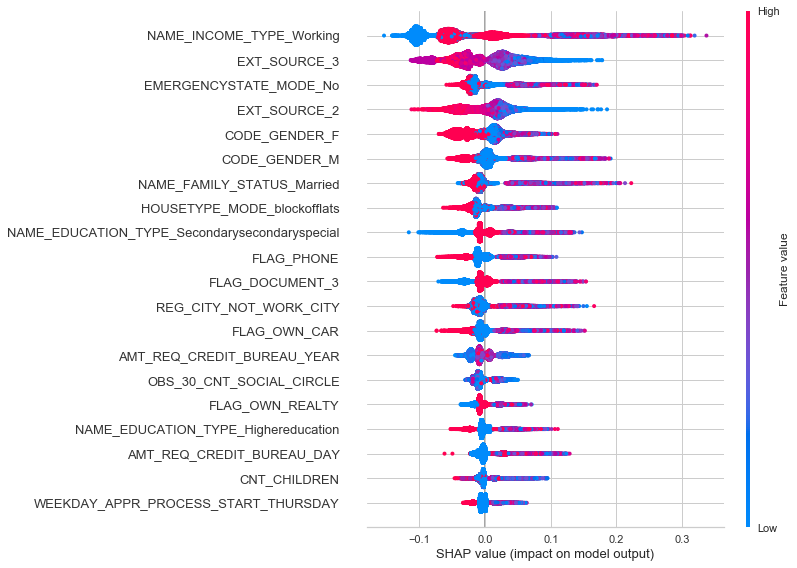

In [34]:
shap.summary_plot(shap_values, valid_x)

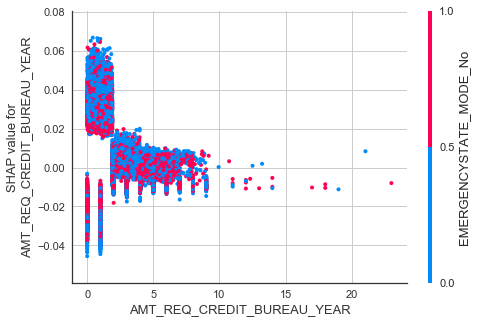

In [35]:
shap.dependence_plot("AMT_REQ_CREDIT_BUREAU_YEAR", shap_values, valid_x)

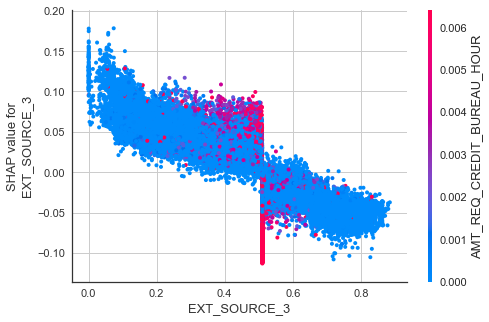

In [36]:
shap.dependence_plot("EXT_SOURCE_3", shap_values, valid_x)

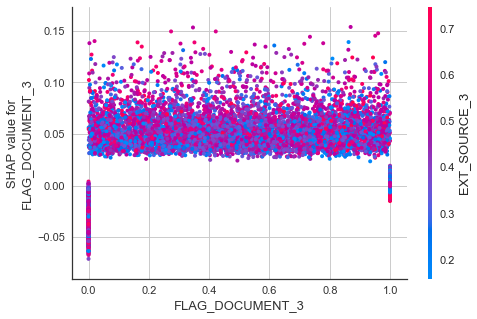

In [37]:
shap.dependence_plot("FLAG_DOCUMENT_3", shap_values, valid_x)

In [38]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


In [39]:
'''# Add prediction probability to dataframe
prediction = lgbm.predict(X)

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y, prediction)'''

'# Add prediction probability to dataframe\nprediction = lgbm.predict(X)\n\n# Find optimal probability threshold\nthreshold = Find_Optimal_Cutoff(y, prediction)'

In [40]:
data = X.copy()

In [41]:
# Add prediction probability to dataframe
data['pred_proba'] = lgbm.predict(X)

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y, data['pred_proba'])
print(threshold)
# [0.20532508503129043]

# Find prediction to the dataframe applying threshold
data['pred'] = data['pred_proba'].map(lambda x: 1 if x > threshold[0] else 0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y, data['pred'])
#array([[117191,   7678],
#       [  7689, 117442]])

[0.20721146709845328]


array([[117157,   7712],
       [  7722, 117409]], dtype=int64)